In [1]:
# 1) import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import seaborn as sns
import datetime

In [2]:
# 2) import and process datasets
kew_2015 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Kew\midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00723_kew-gardens_qcv-1_2015.csv', index_col=0)
kew_2016 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Kew\midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00723_kew-gardens_qcv-1_2016.csv', index_col=0)
kew_2017 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Kew\midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00723_kew-gardens_qcv-1_2017.csv', index_col=0)
kew_2018 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Kew\midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00723_kew-gardens_qcv-1_2018.csv', index_col=0)
kew_2019 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Kew\midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00723_kew-gardens_qcv-1_2019.csv', index_col=0)
kew_2020 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Kew\midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00723_kew-gardens_qcv-1_2020.csv', index_col=0)

heath_2015 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Heathrow/midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00708_heathrow_qcv-1_2015.csv', index_col=0)
heath_2016 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Heathrow/midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00708_heathrow_qcv-1_2016.csv', index_col=0)
heath_2017 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Heathrow/midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00708_heathrow_qcv-1_2017.csv', index_col=0)
heath_2018 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Heathrow/midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00708_heathrow_qcv-1_2018.csv', index_col=0)
heath_2019 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Heathrow/midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00708_heathrow_qcv-1_2019.csv', index_col=0)
heath_2020 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Heathrow/midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00708_heathrow_qcv-1_2020.csv', index_col=0)

kew_2015 = kew_2015[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
kew_2016 = kew_2016[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
kew_2017 = kew_2017[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
kew_2018 = kew_2018[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
kew_2019 = kew_2019[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
kew_2020 = kew_2020[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]

heath_2015 = heath_2015[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
heath_2016 = heath_2016[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
heath_2017 = heath_2017[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
heath_2018 = heath_2018[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
heath_2019 = heath_2019[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
heath_2020 = heath_2020[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]

kew_2015.index = pd.to_datetime(kew_2015.index, format='%d/%m/%Y %H:%M')
kew_2016.index = pd.to_datetime(kew_2016.index, format='%d/%m/%Y %H:%M')
kew_2017.index = pd.to_datetime(kew_2017.index, format='%d/%m/%Y %H:%M')
kew_2018.index = pd.to_datetime(kew_2018.index, format='%d/%m/%Y %H:%M')
kew_2019.index = pd.to_datetime(kew_2019.index, format='%d/%m/%Y %H:%M')
kew_2020.index = pd.to_datetime(kew_2020.index, format='%d/%m/%Y %H:%M')

heath_2015.index = pd.to_datetime(heath_2015.index, format='%d/%m/%Y %H:%M')
heath_2016.index = pd.to_datetime(heath_2016.index, format='%d/%m/%Y %H:%M')
heath_2017.index = pd.to_datetime(heath_2017.index, format='%d/%m/%Y %H:%M')
heath_2018.index = pd.to_datetime(heath_2018.index, format='%d/%m/%Y %H:%M')
heath_2019.index = pd.to_datetime(heath_2019.index, format='%d/%m/%Y %H:%M')
heath_2020.index = pd.to_datetime(heath_2020.index, format='%d/%m/%Y %H:%M')

idx_2015 = pd.date_range('2015/01/01-00:00:00', '2015/12/31 23:00:00	', freq="60min")
idx_2016 = pd.date_range('2016/01/01-00:00:00', '2016/12/31 23:00:00	', freq="60min")
idx_2017 = pd.date_range('2017/01/01-00:00:00', '2017/12/31 23:00:00	', freq="60min")
idx_2018 = pd.date_range('2018/01/01-00:00:00', '2018/12/31 23:00:00	', freq="60min")
idx_2019 = pd.date_range('2019/01/01-00:00:00', '2019/12/31 23:00:00	', freq="60min")
idx_2020 = pd.date_range('2020/01/01-00:00:00', '2020/12/31 23:00:00	', freq="60min")

kew_2015 = kew_2015.reindex(idx_2015, fill_value=0)
heath_2015 = heath_2015.reindex(idx_2015, fill_value=0)

kew_2016 = kew_2016.reindex(idx_2016, fill_value=0)
heath_2016 = heath_2016.reindex(idx_2016, fill_value=0)

kew_2017 = kew_2017.reindex(idx_2017, fill_value=0)
heath_2017 = heath_2017.reindex(idx_2017, fill_value=0)

kew_2018 = kew_2018.reindex(idx_2018, fill_value=0)
heath_2018 = heath_2018.reindex(idx_2018, fill_value=0)

kew_2019 = kew_2019.reindex(idx_2019, fill_value=0)
heath_2019 = heath_2019.reindex(idx_2019, fill_value=0)

kew_2020 = kew_2020.reindex(idx_2020, fill_value=0)
heath_2020 = heath_2020.reindex(idx_2020, fill_value=0)

kew_2015 = kew_2015.fillna(value=kew_2015.mean())
kew_2016 = kew_2016.fillna(value=kew_2015.mean())
kew_2017 = kew_2017.fillna(value=kew_2015.mean())
kew_2018 = kew_2018.fillna(value=kew_2015.mean())
kew_2019 = kew_2019.fillna(value=kew_2015.mean())
kew_2020 = kew_2020.fillna(value=kew_2015.mean())

heath_2015 = heath_2015.fillna(value=kew_2015.mean())
heath_2016 = heath_2016.fillna(value=kew_2015.mean())
heath_2017 = heath_2017.fillna(value=kew_2015.mean())
heath_2018 = heath_2018.fillna(value=kew_2015.mean())
heath_2019 = heath_2019.fillna(value=kew_2015.mean())
heath_2020 = heath_2020.fillna(value=kew_2015.mean())

kew_2015_2020 = pd.concat([kew_2015, kew_2016, kew_2017, kew_2018, kew_2019, kew_2020])
heath_2015_2020 = pd.concat([heath_2015, heath_2016, heath_2017, heath_2018, heath_2019, heath_2020])
kew_2015_2020 = kew_2015_2020.add_suffix('_kew')
heath_2015_2020 = heath_2015_2020.add_suffix('_heath')
heath_kew_2015_2020 = pd.concat([kew_2015_2020, heath_2015_2020], axis=1)
df = heath_kew_2015_2020

C:\Users\gabri\AppData\Local\Temp\ipykernel_22176\1940472681.py:9: DtypeWarning: Columns (93) have mixed types. Specify dtype option on import or set low_memory=False.
  heath_2015 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Heathrow/midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00708_heathrow_qcv-1_2015.csv', index_col=0)


In [3]:
# 3) review dataframe
df.head(3)

,wind_direction_kew,wind_speed_kew,air_temperature_kew,dewpoint_kew,wetb_temp_kew,rltv_hum_kew,wind_direction_heath,wind_speed_heath,air_temperature_heath,dewpoint_heath,wetb_temp_heath,rltv_hum_heath
2015-01-01 00:00:00,210.0,4.0,4.4,2.3,3.6,86.9,200.0,9.0,5.0,2.7,4.1,85.3
2015-01-01 01:00:00,200.0,3.0,5.2,2.9,4.3,85.8,200.0,9.0,5.3,3.0,4.4,85.6
2015-01-01 02:00:00,200.0,4.0,5.9,3.7,5.0,86.2,180.0,7.0,5.8,3.9,5.0,87.5


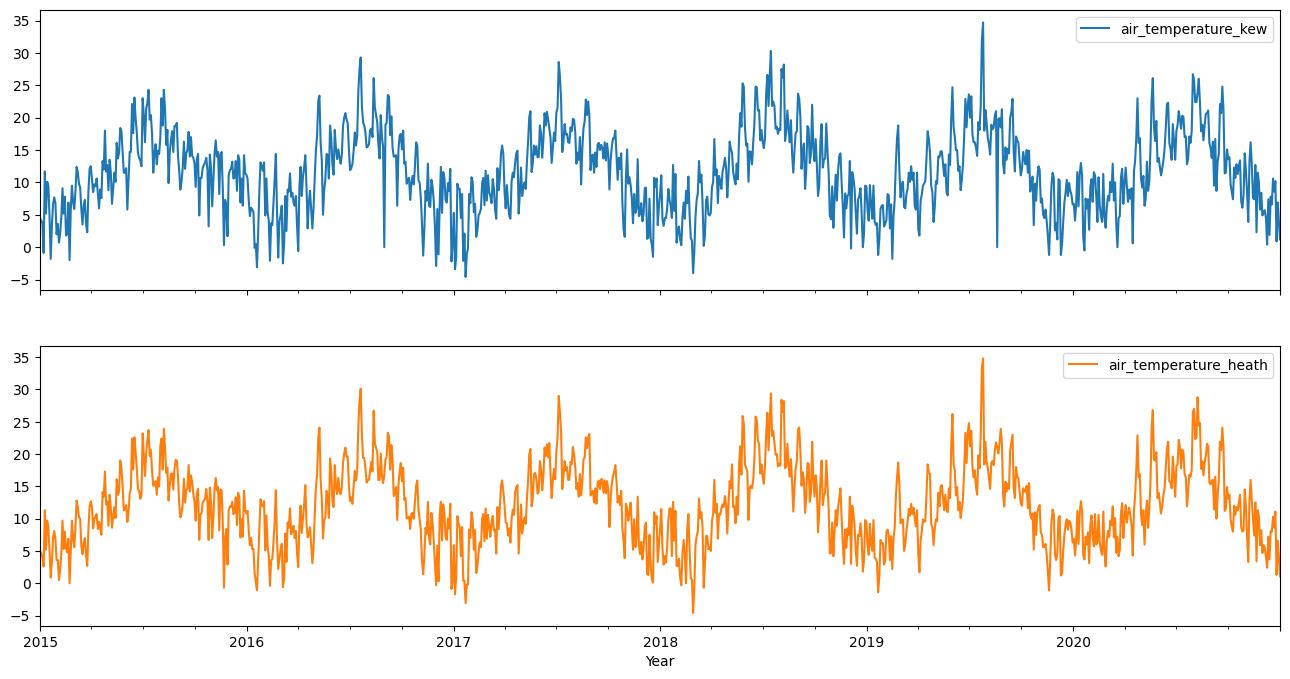

In [4]:
plt.rcParams["figure.figsize"] = (16, 8)

#df[['air_temperature_kew', 'air_temperature_heath', 'rltv_hum_kew', 'rltv_hum_heath','wind_speed_heath', 'wind_speed_kew']][::50].plot(xlabel='Year', subplots=True)
df[['air_temperature_kew', 'air_temperature_heath']][::50].plot(xlabel='Year', subplots=True)
plt.show()


In [ ]:
import random
random.choices(population=[1,2,3,4,100,1000],
                weights=[],
                k=2)
